<a href="https://colab.research.google.com/github/rohitchauhan2004/PlacementPredictor/blob/main/Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [16]:
df.head(10)

,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,Mkt&Fin,51.58,Not Placed,NaN
6,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,Mkt&Fin,53.29,Not Placed,NaN
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,Mkt&Fin,62.14,Placed,252000.0
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,Mkt&Fin,61.29,Placed,231000.0
9,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,Mkt&Fin,52.21,Not Placed,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno             215 non-null    int64  
 1   Gender          215 non-null    object 
 2   10th %          215 non-null    float64
 3   SSC Board       215 non-null    object 
 4   12th %          215 non-null    float64
 5   HSC Board       215 non-null    object 
 6   12th Stream     215 non-null    object 
 7   Degree %        215 non-null    float64
 8   Degree stream   215 non-null    object 
 9   Work exp        215 non-null    object 
 10  specialisation  215 non-null    object 
 11  Mba %           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [9]:
df.shape

(215, 14)

In [18]:
# Convert 'Placed'/'Not Placed' to binary
df['status_binary'] = df['status'].map({'Placed': 1, 'Not Placed': 0})

# Correlation with placement
correlations = df.corr(numeric_only=True)['status_binary'].sort_values(ascending=False)
print(correlations)

status_binary    1.000000
10th %           0.607889
12th %           0.491228
Degree %         0.479861
Mba %            0.076922
salary                NaN
Name: status_binary, dtype: float64


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Step 1: Copy and drop 'salary' only once
# Changed 'data' to 'df' to use the existing DataFrame
label_data = df.copy()
label_data = label_data.drop(columns=['salary'])

# Step 2: Encode categorical features
for col in label_data.select_dtypes(include='object'):
    label_data[col] = LabelEncoder().fit_transform(label_data[col])

# Step 3: Make sure there are no NaNs left
if label_data.isnull().sum().sum() > 0:
    print("Still has NaNs, filling them...")
    label_data = label_data.fillna(0)  # or use a smarter strategy if needed

# Step 4: Chi-square test
X = label_data.drop(columns=['status', 'status_binary'])
y = label_data['status_binary']
chi_scores, _ = chi2(X, y)

# Step 5: Display results
chi2_df = pd.Series(chi_scores, index=X.columns).sort_values(ascending=False)
print(chi2_df)

10th %            137.739258
12th %             92.449312
Degree %           40.204896
Work exp           10.745484
specialisation      7.539357
Mba %               0.691857
Gender              0.624805
SSC Board           0.161359
Degree stream       0.117084
12th Stream         0.058876
HSC Board           0.024118
dtype: float64


In [26]:
df = df.drop(columns=['Mba %', 'Gender', 'Degree stream', 'SSC Board', 'HSC Board', '12th Stream','salary','specialisation'])

In [28]:
df.head()


,10th %,12th %,Degree %,Work exp,status,status_binary
0,67.00,91.00,58.00,No,Placed,1
1,79.33,78.33,77.48,Yes,Placed,1
2,65.00,68.00,64.00,No,Placed,1
3,56.00,52.00,52.00,No,Not Placed,0
4,85.80,73.60,73.30,No,Placed,1


In [29]:
features = ['10th %', '12th %', 'Degree %', 'Work exp']
X = label_data[features]
y = label_data['status_binary']

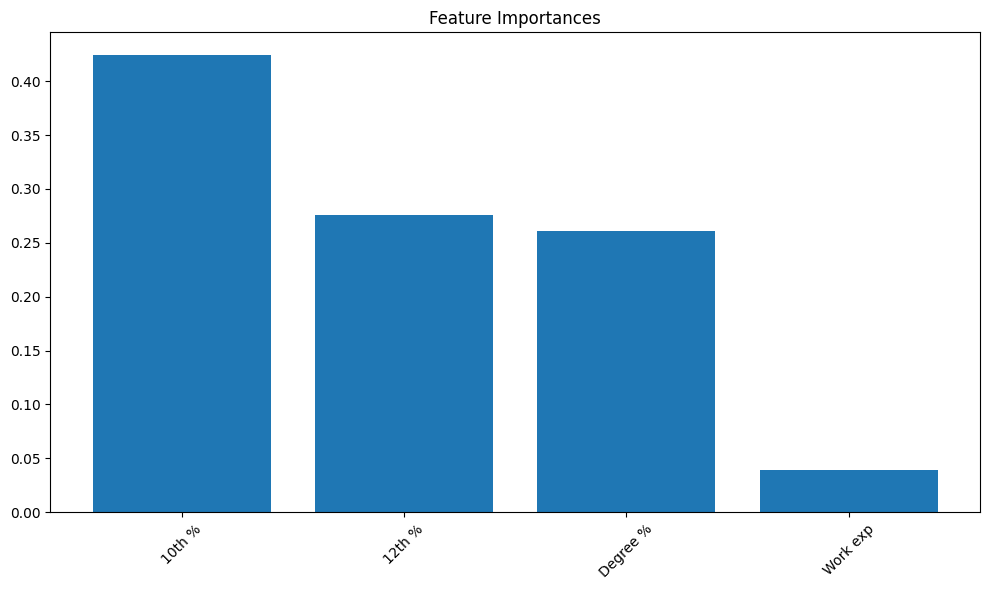

In [31]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Split the data into training and testing sets
# Assuming you want to use the features defined earlier for the model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
best_rf = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf.fit(X_train, y_train)

# Now the plotting code can be executed
importances = best_rf.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=45)
plt.tight_layout()
plt.show()


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
RandomForestClassifier(random_state=42)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 6  6]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.82      0.90      0.86        31

    accuracy                           0.79        43
   macro avg       0.75      0.70      0.72        43
weighted avg       0.78      0.79      0.78        43

Accuracy: 0.7906976744186046


In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7441860465116279
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.79      0.87      0.83        31

    accuracy                           0.74        43
   macro avg       0.67      0.64      0.65        43
weighted avg       0.73      0.74      0.73        43



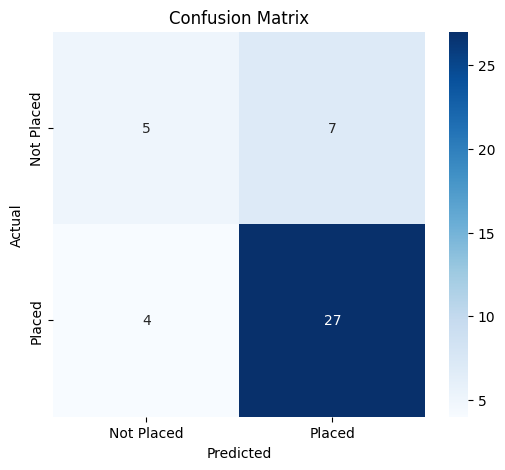

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

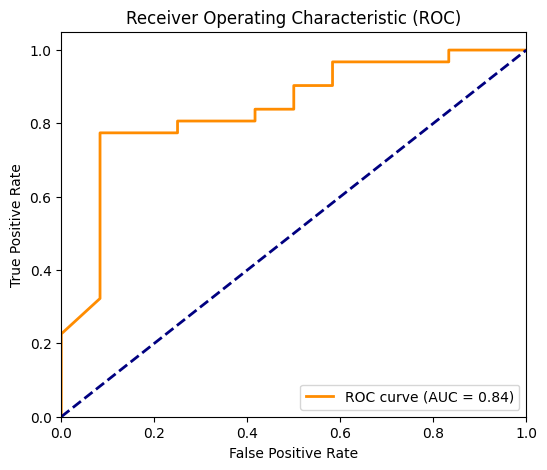

In [38]:
from sklearn.metrics import roc_curve, auc

y_proba = best_rf.predict_proba(X_test)[:,1]  # probability estimates for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()